In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/gaurisonawane/Downloads/Fraud_check.csv")

In [3]:
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
data.isnull()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [11]:
data = pd.get_dummies(data, columns = ['Undergrad','Marital.Status','Urban'], drop_first = True)

In [12]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [5]:
import matplotlib.pyplot as plt

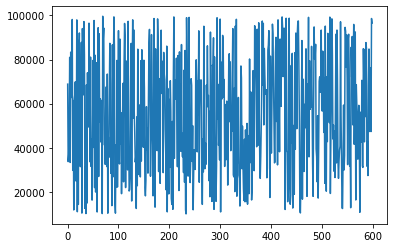

In [7]:
plt.plot(data['Taxable.Income'])

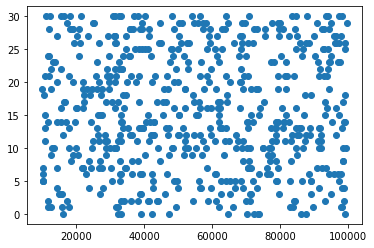

In [8]:
plt.scatter(data['Taxable.Income'],data['Work.Experience'])

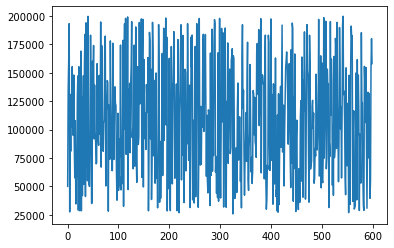

In [10]:
plt.plot(data['City.Population'])

In [11]:
import seaborn as sns

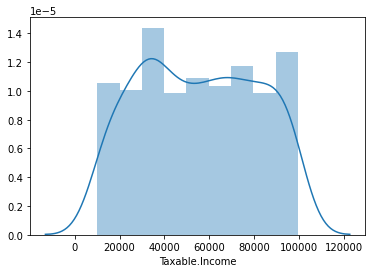

In [12]:
sns.distplot(data['Taxable.Income'])

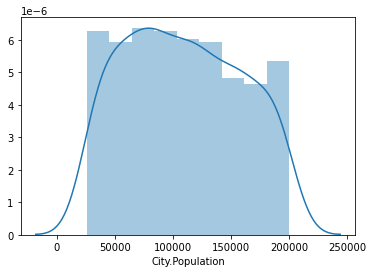

In [13]:
sns.distplot(data['City.Population'])

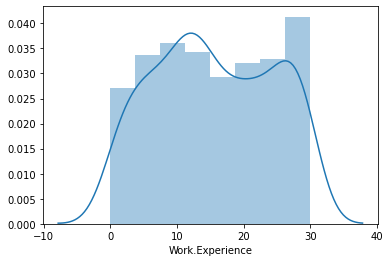

In [14]:
sns.distplot(data['Work.Experience'])

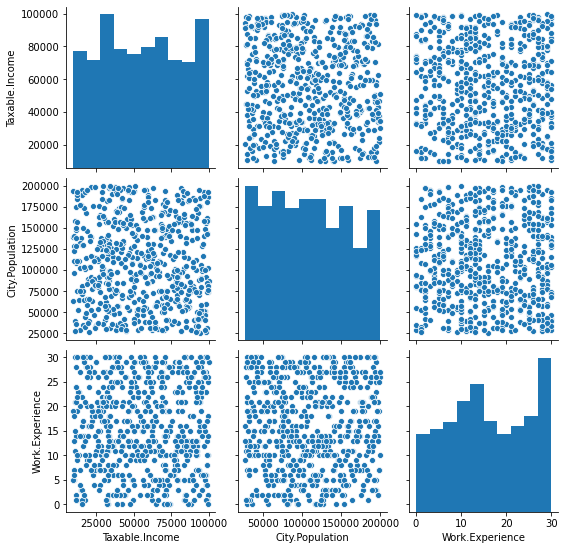

In [16]:
sns.pairplot(data)

In [13]:
data["Tax_Income"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [14]:
data.head(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Income
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
5,33329,116382,0,0,0,0,0,Good
6,83357,80890,8,0,0,0,1,Good
7,62774,131253,3,1,0,1,1,Good
8,83519,102481,12,0,0,1,1,Good
9,98152,155482,4,1,0,0,1,Good


In [15]:
data = pd.get_dummies(data, columns = ["Tax_Income"], drop_first =True)

In [16]:
data.head(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Income_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
5,33329,116382,0,0,0,0,0,1
6,83357,80890,8,0,0,0,1,1
7,62774,131253,3,1,0,1,1,1
8,83519,102481,12,0,0,1,1,1
9,98152,155482,4,1,0,0,1,1


In [17]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
data_norm = norm_fun(data.iloc[:,1:])

In [19]:
data_norm.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Income_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [21]:
x = data_norm.drop(['Tax_Income_Good'], axis = 1)
y = data_norm['Tax_Income_Good']

In [22]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 1)

In [45]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [46]:
print('Train_Accuracy : {}'.format(model.score(x_train, y_train)))
print('Test_Accuracy : {}'.format(model.score(x_test, y_test)))

Train_Accuracy : 0.8020833333333334
Test_Accuracy : 0.7583333333333333
